# Multiclass Classification in Four Approaches

In [19]:
# Import Libraries
import numpy as np
import seaborn as sns
import pandas as pd

# Image
import imageio
import matplotlib.pyplot as plt
from skimage import data

# Graphs 
!matplotlib inline
import matplotlib.pyplot as plt

# For these examples, sklearn is featured
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

/bin/sh: matplotlib: command not found


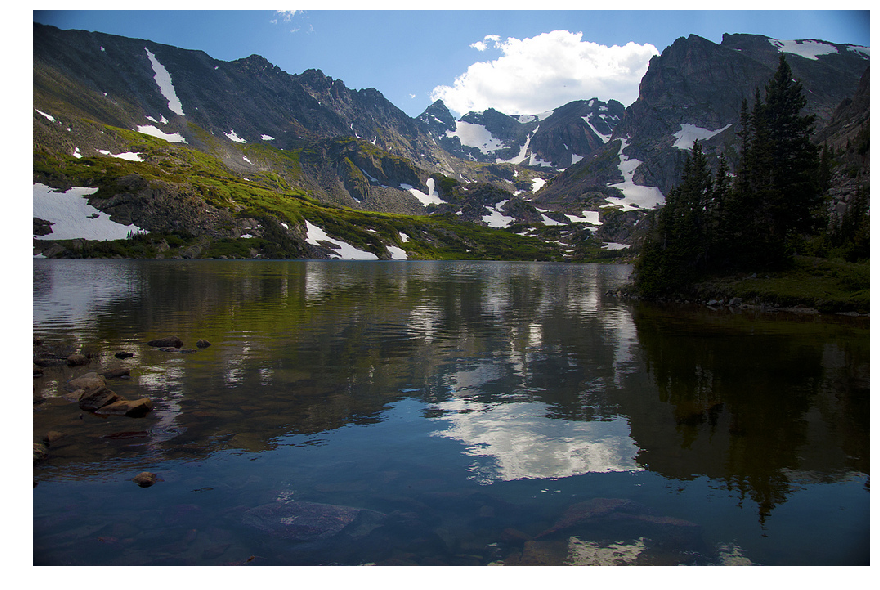

In [20]:
photo_roosevelt_natl_park = imageio.imread('/Users/meganporter/OwnJupyterNotebooks/Lake_Isabelle,_Roosevelt_National_Forest.jpg')
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(photo_roosevelt_natl_park)
#Photo courtesy of Wikipedia

### From the Forest Cover Type Data Set, accessed on Kaggle, we can try to predict the forest cover type in the Roosevelt National Forest in Colorado.  The data set contains fifty-four input variables including, elevation, slope, aspect, and horizontal and vertical distance to water.  There are seven possible output labels, or tree species cover.  These are: 
### 1. Spruce/Fir    2. Lodgepole Pine    3. Ponderosa Pine    4. Cottonwood/Willow    5. Aspen    6. Douglas-fir and 7. Krummholz.

##### Complete information can be found here: https://www.kaggle.com/uciml/forest-cover-type-dataset

### Preliminary Look at Data

In [9]:
forest_raw = pd.read_csv('/Users/meganporter/OwnJupyterNotebooks/covtype.csv')
forest_raw.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [10]:
# Check for null values
forest_raw.isnull()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Decision Tree Classifier

In [16]:
# X is the classification predictor characteristics, y is the target label
X = forest_raw[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points',
                'Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type1','Soil_Type2',
                'Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11',
                'Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19',
                'Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26',
                'Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33',
                'Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40']]
y = forest_raw['Cover_Type']

In [17]:
# Divide X and y into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [19]:
# Train a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
decision_tree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
decision_tree_predictions = decision_tree_model.predict(X_test) 

In [20]:
decision_tree_predictions

array([2, 2, 3, ..., 2, 2, 1])

### What is the accuracy of the Decision Tree Model on this Data Set?

In [26]:
# Get a measure of accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, decision_tree_predictions)
print(accuracy)

0.6703200622362361


#### The accuracy is 0.67

### A more complete report

In [29]:
# SKLEARN classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, decision_tree_predictions)
print(report)

             precision    recall  f1-score   support

          1       0.63      0.73      0.68     52943
          2       0.72      0.74      0.73     70897
          3       0.57      0.69      0.62      8890
          4       0.00      0.00      0.00       704
          5       0.00      0.00      0.00      2340
          6       0.00      0.00      0.00      4384
          7       0.00      0.00      0.00      5095

avg / total       0.62      0.67      0.64    145253



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Support Vector Machines (SVM) Classification

In [1]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

In [4]:
# Read Data
forest = pd.read_csv('/Users/meganporter/OwnJupyterNotebooks/covtype.csv')

In [5]:
# X is the classification predictor characteristics, y is the target label
X = forest[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points',
                'Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type1','Soil_Type2',
                'Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11',
                'Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19',
                'Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26',
                'Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33',
                'Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40']]
y = forest['Cover_Type']

In [6]:
# Divide X and y into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#### My computer keeps freezing at this cell: 

In [ ]:
# Train a linear SVM classifier
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test)

In [ ]:
# Create a model for accuracy for X_test   
accuracy_score = svm_model_linear.score(X_test, y_test)

## K Nearest Neighbor (KNN) Classifier

In [1]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

In [5]:
# Read Data
forest = pd.read_csv('/Users/meganporter/OwnJupyterNotebooks/covtype.csv')

In [6]:
# X is the classification predictor characteristics, y is the target label
X = forest[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points',
                'Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type1','Soil_Type2',
                'Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11',
                'Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19',
                'Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26',
                'Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33',
                'Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40']]
y = forest['Cover_Type']

In [7]:
# Divide X, y into train and test data, input and output variables 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [8]:
# Train the KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

In [9]:
# Accuracy on X_test 
accuracy_score = knn.score(X_test, y_test) 
print(accuracy_score) 

0.9652674987779942


#### The accuracy of KNN on this data set is 0.97

In [11]:
# Create a confusion matrix/contingency table for visualization of accuracy 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

[[51080  1717     1     0    35     5   105]
 [ 1537 69034    95     0   127    87    17]
 [    2   148  8566    28     9   137     0]
 [    0     1   144   520     0    39     0]
 [   22   244    15     0  2054     5     0]
 [    4   130   201    23     5  4021     0]
 [  139    22     0     0     1     0  4933]]


#### The values of the correct predictions for cover type span the diagonal entries from top-left to lower_right.

## Naive Bayes Classifier

In [12]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

In [13]:
# Read data
forest = pd.read_csv('/Users/meganporter/OwnJupyterNotebooks/covtype.csv')

In [14]:
# X is the classification predictor characteristics, y is the target label
X = forest[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points',
                'Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type1','Soil_Type2',
                'Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11',
                'Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19',
                'Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26',
                'Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33',
                'Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40']]
y = forest['Cover_Type']

In [15]:
# Divide X, y into train and test data, inputs and outputs 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [16]:
# Train the Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gaussian_nbayes = GaussianNB().fit(X_train, y_train) 
gaussian_nbayes_predictions = gaussian_nbayes.predict(X_test)

In [17]:
# Accuracy for the X_test 
accuracy_score = gaussian_nbayes.score(X_test, y_test) 
print(accuracy_score)

0.457883830282335


#### The accuracy for Naive Bayes on this data set is only 0.46.